In [8]:
# handle imports
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)

In [11]:
df = pd.read_csv("../data.csv", sep=";")
df = df[df.Target != 'Enrolled']

              precision    recall  f1-score   support

     Dropout       0.89      0.85      0.87       277
    Graduate       0.91      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



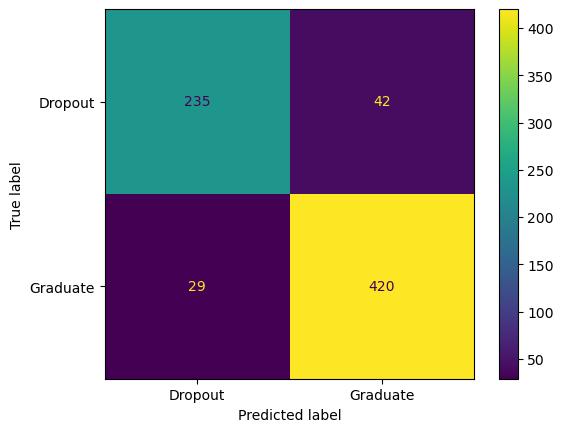

In [12]:
X = df.drop(columns=['Target'])
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a binomial logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)
joblib.dump(logreg, "bi-logistic-reg.pkl")
# Make predictions on the test data
predictions = logreg.predict(X_test)


print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)